In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/afs/inf.ed.ac.uk/user/s11/s1145806/Documents/git/neukrill-net-work


In [3]:
import sys
import numpy as np
import skimage
import cv2
import sklearn

In [5]:
import imp

In [6]:
import holoviews

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [7]:
%load_ext holoviews.ipython

Welcome to the HoloViews IPython extension! (http://ioam.github.io/holoviews/)
Available magics: %compositor, %opts, %params, %view, %%labels, %%opts, %%view


In [8]:
import neukrill_net.utils
import neukrill_net.highlevelfeatures

In [9]:
import time

In [10]:
import mahotas

In [11]:
settings = neukrill_net.utils.Settings('settings.json')

In [12]:
X,y = settings.flattened_train_paths(settings.classes)

In [13]:
H = mahotas.features.haralick(neukrill_net.highlevelfeatures.loadimage(X[0]))

In [14]:
H

array([[  5.96246215e-01,   9.36057994e+01,   8.69212478e-01,
          3.57854472e+02,   8.40299018e-01,   5.04100052e+02,
          1.33781209e+03,   1.74656209e+00,   2.13745597e+00,
          2.44471960e-03,   1.50417321e+00,  -2.97456891e-01,
          7.25368324e-01],
       [  5.90407904e-01,   1.65499469e+02,   7.72179871e-01,
          3.63223984e+02,   8.36613763e-01,   5.04009284e+02,
          1.28739647e+03,   1.79006532e+00,   2.19116187e+00,
          2.41530385e-03,   1.55429730e+00,  -2.75972162e-01,
          7.10040310e-01],
       [  5.96714914e-01,   8.52161669e+01,   8.80720868e-01,
          3.57213225e+02,   8.39870373e-01,   5.04108475e+02,
          1.34363673e+03,   1.75212804e+00,   2.13801150e+00,
          2.44732258e-03,   1.51517479e+00,  -2.98367275e-01,
          7.26307520e-01],
       [  5.88269882e-01,   1.25390716e+02,   8.27392020e-01,
          3.63223984e+02,   8.32801944e-01,   5.04009284e+02,
          1.32750522e+03,   1.81663231e+00,   2.229

In [15]:
H.shape

(4, 13)

In [16]:
(np.amax(H, 0) - np.amin(H, 0)).shape

(13,)

In [17]:
hlf = neukrill_net.highlevelfeatures.Haralick()

In [18]:
hlf.extract_image(neukrill_net.highlevelfeatures.loadimage(X[0]))

array([  5.92909729e-01,   1.17428038e+02,   8.37376309e-01,
         3.60378916e+02,   8.37396275e-01,   5.04056774e+02,
         1.32408763e+03,   1.77634694e+00,   2.17408130e+00,
         2.42847737e-03,   1.54530917e+00,  -2.79362396e-01,
         7.10802264e-01,   8.44503234e-03,   8.02833026e+01,
         1.08540997e-01,   6.01075856e+00,   7.49707356e-03,
         9.91907566e-02,   5.62402684e+01,   7.00702220e-02,
         9.22398670e-02,   4.07591384e-05,   1.03418161e-01,
         5.27140192e-02,   4.48146178e-02])

In [23]:
tmp = sklearn.externals.joblib.load('cache/'+'haralick.pkl')
hlf = tmp[0]
XF = tmp[1]

In [24]:
XF.shape

(1, 30336, 26)

## Stochastic Gradient Descent Classifier

In [25]:
clf = sklearn.linear_model.SGDClassifier(loss='log', penalty='elasticnet')

In [26]:
t0 = time.time()
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(XF.squeeze(0), y, test_size=0.5, random_state=42)
clf.fit(X_train, y_train)

t1 = time.time()
total = t1-t0
print("Time={}".format(total))

print("Accuracy={}".format(clf.score(X_test, y_test)))
print("Logloss={}".format(sklearn.metrics.log_loss(y_test, 0.5*settings.class_priors + 0.5*clf.predict_proba(X_test))))

Time=1.47219586372
Accuracy=0.0768064345992


/afs/inf.ed.ac.uk/user/s11/s1145806/Documents/git/neukrill-venv-auto/lib/python2.7/site-packages/sklearn/linear_model/base.py:231: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/afs/inf.ed.ac.uk/user/s11/s1145806/Documents/git/neukrill-venv-auto/lib/python2.7/site-packages/sklearn/linear_model/base.py:238: RuntimeWarning: invalid value encountered in true_divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
settings.class_priors.shape

In [ ]:
clf.predict_proba(X_test).shape

Maybe we can do better if we run for longer

In [27]:
clf = sklearn.linear_model.SGDClassifier(loss='log', penalty='elasticnet', n_iter=100)

t0 = time.time()
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(XF.squeeze(0), y, test_size=0.5, random_state=42)
clf.fit(X_train, y_train)

t1 = time.time()
total = t1-t0
print("Time={}".format(total))

print("Accuracy={}".format(clf.score(X_test, y_test)))
print("Logloss={}".format(sklearn.metrics.log_loss(y_test, 0.5*settings.class_priors + 0.5*clf.predict_proba(X_test))))

Time=28.0479290485
Accuracy=0.0333597046414


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

That was worse!

How about even longer?

In [28]:
clf = sklearn.linear_model.SGDClassifier(loss='log', penalty='elasticnet', n_iter=1000)

t0 = time.time()
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(XF.squeeze(0), y, test_size=0.5, random_state=42)
clf.fit(X_train, y_train)

t1 = time.time()
total = t1-t0
print("Time={}".format(total))

print("Accuracy={}".format(clf.score(X_test, y_test)))
print("Logloss={}".format(sklearn.metrics.log_loss(y_test, 0.5*settings.class_priors + 0.5*clf.predict_proba(X_test))))

Time=274.172209024
Accuracy=0.0393591772152


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [29]:
clf = sklearn.linear_model.SGDClassifier(loss='log', penalty='elasticnet', shuffle=True, n_jobs=12, n_iter=1000)

t0 = time.time()
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(XF.squeeze(0), y, test_size=0.5, random_state=42)
clf.fit(X_train, y_train)

t1 = time.time()
total = t1-t0
print("Time={}".format(total))

print("Accuracy={}".format(clf.score(X_test, y_test)))
print("Logloss={}".format(sklearn.metrics.log_loss(y_test, 0.5*settings.class_priors + 0.5*clf.predict_proba(X_test))))

Time=78.1839120388
Accuracy=0.145239978903


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [31]:
clf = sklearn.linear_model.SGDClassifier(loss='log', penalty='elasticnet', shuffle=True, n_jobs=12, n_iter=1000)

t0 = time.time()
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(XF.squeeze(0), y, test_size=0.5, random_state=42)
sclr = sklearn.preprocessing.StandardScaler()
X_train = sclr.fit_transform(X_train)
X_test = sclr.transform(X_test)
clf.fit(X_train, y_train)

t1 = time.time()
total = t1-t0
print("Time={}".format(total))

print("Accuracy={}".format(clf.score(X_test, y_test)))
print("Logloss={}".format(sklearn.metrics.log_loss(y_test, 0.5*settings.class_priors + 0.5*clf.predict_proba(X_test))))

Time=130.237476826
Accuracy=0.412974683544
Logloss=2.82165316047


In [30]:
clf = sklearn.linear_model.SGDClassifier(loss='log', penalty='elasticnet', shuffle=True, n_jobs=12, n_iter=10000)

t0 = time.time()
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(XF.squeeze(0), y, test_size=0.5, random_state=42)
clf.fit(X_train, y_train)

t1 = time.time()
total = t1-t0
print("Time={}".format(total))

print("Accuracy={}".format(clf.score(X_test, y_test)))
print("Logloss={}".format(sklearn.metrics.log_loss(y_test, 0.5*settings.class_priors + 0.5*clf.predict_proba(X_test))))

Time=967.770786047
Accuracy=0.15611814346
Logloss=4.1854843027


In [32]:
clf = sklearn.linear_model.SGDClassifier(loss='log', penalty='elasticnet', shuffle=True, n_jobs=12, n_iter=10000)

t0 = time.time()
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(XF.squeeze(0), y, test_size=0.5, random_state=42)
sclr = sklearn.preprocessing.StandardScaler()
X_train = sclr.fit_transform(X_train)
X_test = sclr.transform(X_test)
clf.fit(X_train, y_train)

t1 = time.time()
total = t1-t0
print("Time={}".format(total))

print("Accuracy={}".format(clf.score(X_test, y_test)))
print("Logloss with prior mixin={}".format(sklearn.metrics.log_loss(y_test, 0.5*settings.class_priors + 0.5*clf.predict_proba(X_test))))
print("Logloss without prior mixin={}".format(sklearn.metrics.log_loss(y_test, clf.predict_proba(X_test))))

Time=1299.10720706
Accuracy=0.414886603376
Logloss=2.77465302998


In [35]:
print("Logloss without prior mixin={}".format(sklearn.metrics.log_loss(y_test, clf.predict_proba(X_test))))

Logloss without mixin=3.02584793616


In [38]:
print settings.classes[48]
print settings.classes[92]
print settings.classes[94]
print settings.classes[95]

euphausiids_young
shrimp_caridean
shrimp_sergestidae
shrimp_zoea


## Random forest

In [26]:
import sklearn.ensemble

In [27]:
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=1000, max_depth=20, min_samples_leaf=5)

In [28]:
t0 = time.time()
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(XF.squeeze(0), y, test_size=0.5, random_state=42)
clf.fit(X_train, y_train)

t1 = time.time()
total = t1-t0
print("Time={}".format(total))

print("Accuracy={}".format(clf.score(X_test, y_test)))
print("Logloss={}".format(sklearn.metrics.log_loss(y_test, clf.predict_proba(X_test))))

Time=155.271783113
Accuracy=0.43769778481
Logloss=2.20424808666


### Plot confusion matrix

In [29]:
np.unique(y_test)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120])

In [30]:
np.unique(y_test)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120])

In [31]:
CM = sklearn.metrics.confusion_matrix(y_test, clf.predict(X_test), labels=np.unique(y))

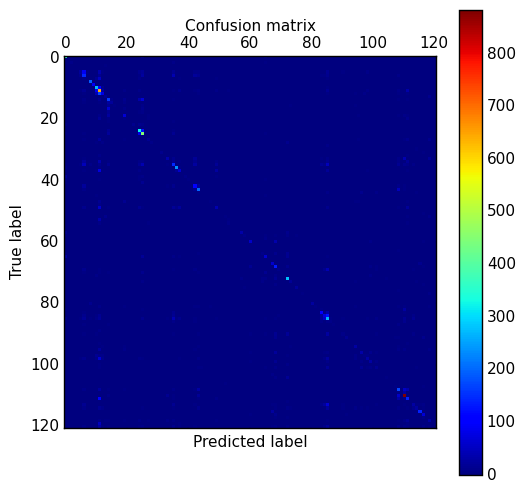

In [32]:
plt.matshow(CM)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Image.Image   (z)
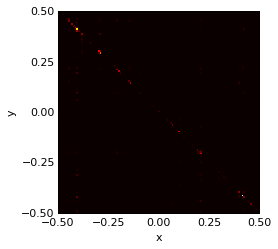

In [33]:
holoviews.Image(CM)

In [34]:
CM.sum(0)

array([ 557,    0,   18,    4,    0,   88,  584,   12,  239,   97,  515,
       1807,  203,   52,  458,   42,   15,    1,    0,  190,    6,    0,
         16,    0,  601,  940,    0,   66,   23,    0,    0,   14,    0,
        120,    1,  527,  290,  167,    2,   19,   23,    2,  292,  415,
          7,    0,    0,   17,    0,  154,    0,    2,   26,   42,    3,
          0,    0,   49,   12,    1,  119,    0,    0,    1,   32,  197,
          0,  121,  376,   42,    6,    0,  476,   60,    0,   34,    0,
         16,    0,    1,   37,   19,    4,  216,  239,  895,   18,   10,
          0,    4,   57,   40,   10,    0,  105,   44,  102,   29,  118,
        108,    0,   80,    0,    0,   15,    0,    0,   15,  510,    0,
       1186,  404,    0,  120,   99,  167,  158,    6,  133,    5,   15])

In [35]:
CM.sum(1)

array([ 440,    5,   36,   18,   10,  277,  335,  126,  201,   90,  407,
        944,  362,   36,  340,   79,   54,  101,   39,  138,   58,   23,
         46,   13,  477,  592,   14,   97,   50,   20,   27,   22,   34,
        180,  184,  486,  256,  243,   13,   49,   38,   36,  194,  295,
         50,   21,    7,   69,   15,  256,    5,   12,   45,   49,   35,
          5,    5,   61,   40,   21,  113,    5,   10,    8,   67,  165,
          4,   85,  194,  132,   75,   39,  347,   66,   22,   32,    9,
         31,    4,   12,   62,   67,   54,  184,  314,  579,   59,   59,
          4,   29,  153,   67,   19,   30,   71,   91,  110,   66,  229,
         87,   29,  128,   15,   13,   50,    7,   15,   19,  359,   38,
       1002,  326,   18,  229,  214,  170,  112,   31,  149,   89,  220])

In [36]:
CM1 = (CM+0.0) / CM.sum(1)

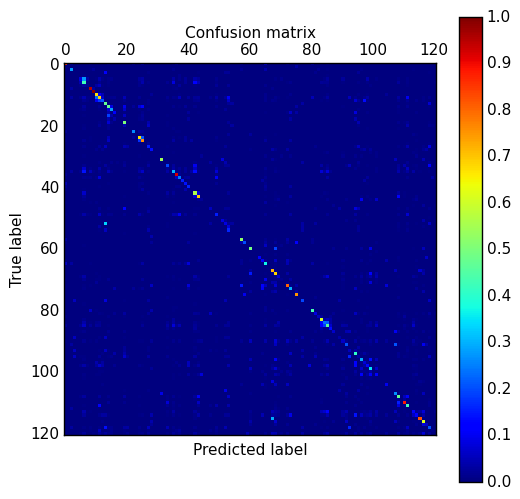

In [37]:
plt.matshow(CM1)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [38]:
def confusion_matrix_from_proba(y_true, y_pred, labels=None):
    y_true = np.array(y_true)
    if labels is None:
        labels = np.union1d(y_true,np.arange(y_pred.shape[1]))
    n_classes = len(labels)
    M = np.zeros((n_classes,n_classes))
    for i in range(n_classes):
        li = (y_true == i)
        M[i,:] = np.mean(y_pred[li,:],0)
    return M

In [39]:
CM2 = confusion_matrix_from_proba(y_test, clf.predict_proba(X_test), labels=np.unique(y))

In [40]:
CM2.shape

(121, 121)

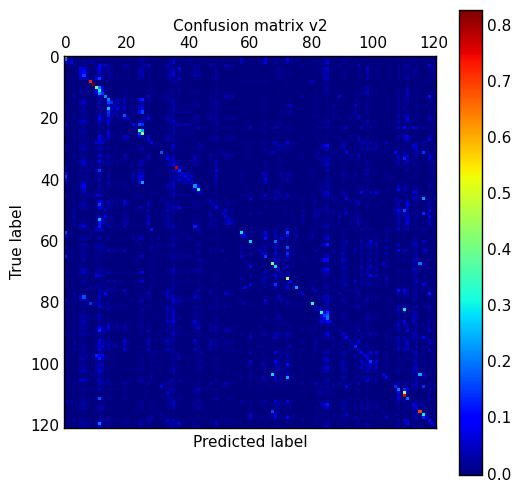

In [41]:
plt.matshow(CM2)
plt.title('Confusion matrix v2')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Determine hierarchy

In [42]:
import scipy.cluster.hierarchy

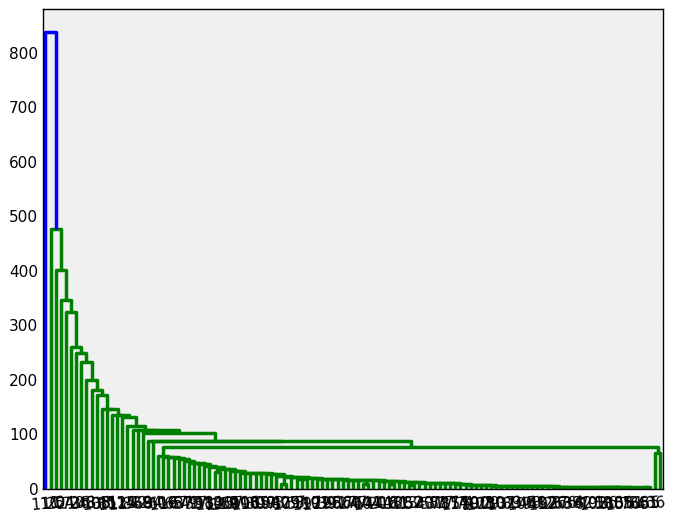

In [43]:
Y = scipy.cluster.hierarchy.distance.pdist(CM, metric='euclidean')
Z = scipy.cluster.hierarchy.linkage(Y, method='single')
ax = scipy.cluster.hierarchy.dendrogram(Z, show_contracted=True)

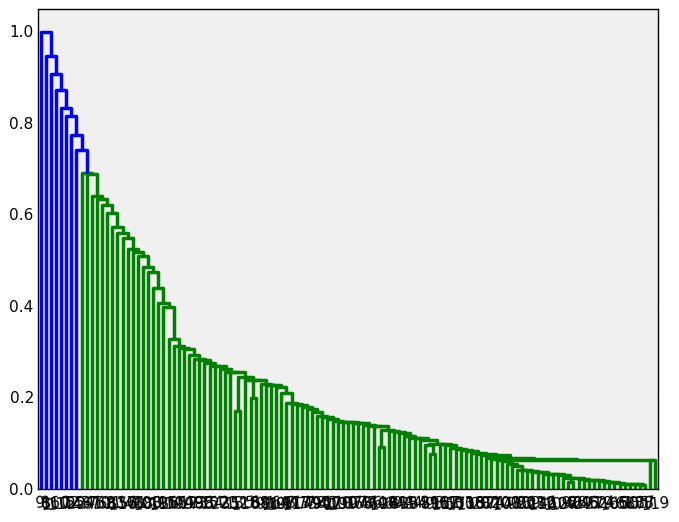

In [44]:
Y = scipy.cluster.hierarchy.distance.pdist(CM1, metric='euclidean')
Z = scipy.cluster.hierarchy.linkage(Y, method='single')
ax = scipy.cluster.hierarchy.dendrogram(Z, show_contracted=True)

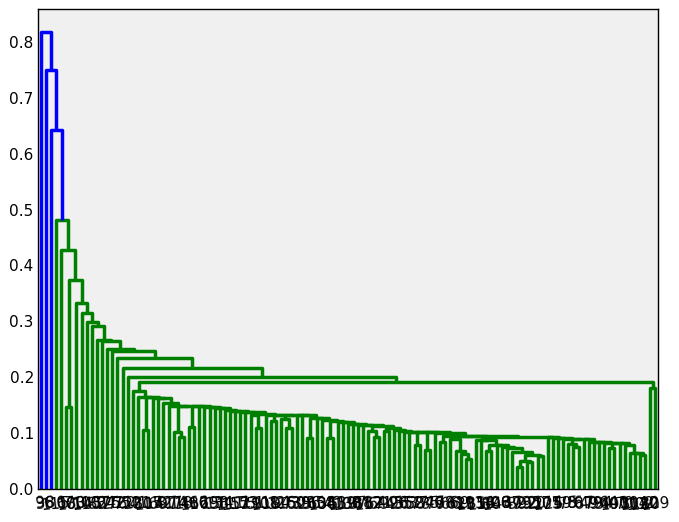

In [45]:
Y = scipy.cluster.hierarchy.distance.pdist(CM2, metric='euclidean')
Z = scipy.cluster.hierarchy.linkage(Y, method='single')
ax = scipy.cluster.hierarchy.dendrogram(Z, show_contracted=True)

## Logistic Regression

In [ ]:
clf = sklearn.linear_model.LogisticRegression(random_state=42)

In [ ]:
t0 = time.time()
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(XF.squeeze(0), y, test_size=0.5, random_state=42)
clf.fit(X_train, y_train)

t1 = time.time()
total = t1-t0
print("Time={}".format(total))

print("Accuracy={}".format(clf.score(X_test, y_test)))
print("Logloss={}".format(sklearn.metrics.log_loss(y_test, clf.predict_proba(X_test))))

Forgot to scale, and that is important for Logistic Regression!

In [ ]:
t0 = time.time()
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(
    sklearn.preprocessing.StandardScaler().fit_transform(XF.squeeze(0)), y, test_size=0.5, random_state=42)
clf.fit(X_train, y_train)

t1 = time.time()
total = t1-t0
print("Time={}".format(total))

print("Accuracy={}".format(clf.score(X_test, y_test)))
print("Logloss={}".format(sklearn.metrics.log_loss(y_test, clf.predict_proba(X_test))))

Now we're about as good as the Random Forest!

## Naive Bayes

In [ ]:
import sklearn.naive_bayes

In [ ]:
clf = sklearn.naive_bayes.GaussianNB()

In [ ]:
t0 = time.time()
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(XF.squeeze(0), y, test_size=0.5, random_state=42)
clf.fit(X_train, y_train)

t1 = time.time()
total = t1-t0
print("Time={}".format(total))

print("Accuracy={}".format(clf.score(X_test, y_test)))
print("Logloss={}".format(sklearn.metrics.log_loss(y_test, clf.predict_proba(X_test))))

Well that sucked. Maybe better with a Z-score?

In [ ]:
t0 = time.time()
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(
    sklearn.preprocessing.StandardScaler().fit_transform(XF.squeeze(0)), y, test_size=0.5, random_state=42)
clf.fit(X_train, y_train)

t1 = time.time()
total = t1-t0
print("Time={}".format(total))

print("Accuracy={}".format(clf.score(X_test, y_test)))
print("Logloss={}".format(sklearn.metrics.log_loss(y_test, clf.predict_proba(X_test))))

Nope. Naive Bayes just plain sucks.

## Support Vector Classifier

### Linear SVC

In [ ]:
clf = sklearn.svm.LinearSVC()

In [ ]:
t0 = time.time()
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(
    sklearn.preprocessing.StandardScaler().fit_transform(XF.squeeze(0)), y, test_size=0.5, random_state=42)
clf.fit(X_train, y_train)

t1 = time.time()
total = t1-t0
print("Time={}".format(total))

print("Accuracy={}".format(clf.score(X_test, y_test)))
print("Logloss={}".format(sklearn.metrics.log_loss(y_test, clf.predict_proba(X_test))))

No predict probabilities opiton with SVC 

### Results so far
We have very similar results for `LogisticRegression` and the `RandomForest`. However, `LogisticRegression` could still be optimised with a grid search.

Let's do proper CV

In [ ]:
cv = sklearn.cross_validation.StratifiedShuffleSplit(y)

In [ ]:
clf = sklearn.linear_model.LogisticRegression(random_state=42)

In [ ]:
print('Cross-validating')
results = []
for train, test in cv:
    sc = sklearn.preprocessing.StandardScaler()
    sc.fit(XF.squeeze(0)[train,:])
    clf.fit(sc.transform(XF.squeeze(0)[train,:]), np.array(y)[train])
    res = sklearn.metrics.log_loss(np.array(y)[test], clf.predict_proba(sc.transform(XF.squeeze(0)[test,:])))
    print(res)
    results.append(res)

In [ ]:
t0 = time.time()
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(XF.squeeze(0), y, test_size=0.5, random_state=42)
clf.fit(X_train, y_train)

t1 = time.time()
total = t1-t0
print("Time={}".format(total))

print("Accuracy={}".format(clf.score(X_test, y_test)))
print("Logloss={}".format(sklearn.metrics.log_loss(y_test, clf.predict_proba(X_test))))

In [ ]:
sklearn.grid_search.GridSearchCV(estimator, param_grid, scoring=None)